# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [1]:
# Code Here
#!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [69]:
lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [('dummify_s',enc,['species']),
    ('dummify_i',enc,['island']),
    ('dummify_se',enc,['sex'])],
    remainder = 'passthrough'
)

my_pipeline = Pipeline(
    [('dummify_everything',ct),('ols',lr)]
)

In [70]:
# Model1
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

fitted_pipeline=my_pipeline.fit(X_train, y_train)
y_preds=fitted_pipeline.predict(X_test)
m1rtest = r2_score(y_test, y_preds)
m1f = 12

y_preds=fitted_pipeline.predict(X_train)
m1rtrain = r2_score(y_train, y_preds)

In [71]:
m1rtrain

0.8370781949463918

In [72]:
# Model2
penguins = penguins.dropna()
X = penguins[['species','island','sex']]
y = penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

fitted_pipeline=my_pipeline.fit(X_train, y_train)
y_preds=fitted_pipeline.predict(X_test)
m2rtest=r2_score(y_test, y_preds)

m2f = 8
y_preds=fitted_pipeline.predict(X_train)
m2rtrain = r2_score(y_train, y_preds)

In [73]:
m2rtrain

0.8109344668403293

In [74]:
# Model3
penguins = penguins.dropna()
X = penguins[['bill_length_mm','flipper_length_mm']]
y = penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

my_pipeline = Pipeline(
    [('ols',lr)]
)

fitted_pipeline=my_pipeline.fit(X_train, y_train)
y_preds=fitted_pipeline.predict(X_test)
m3rtest=r2_score(y_test, y_preds)

m3f = 2
y_preds=fitted_pipeline.predict(X_train)
m3rtrain = r2_score(y_train, y_preds)

In [75]:
m3rtrain

0.38056618558570643

In [76]:
# Model4
penguins = penguins.dropna()
X = penguins[['bill_length_mm','flipper_length_mm', 'body_mass_g','island']]
y = penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

ct = ColumnTransformer(
    [('dummify_i',enc,['island'])]
)

my_pipeline = Pipeline(
    [('dummify_everything',ct),('ols',lr)]
)

fitted_pipeline=my_pipeline.fit(X_train, y_train)
y_preds=fitted_pipeline.predict(X_test)
m4rtest=r2_score(y_test, y_preds)

m4f = 6
y_preds=fitted_pipeline.predict(X_train)
m4rtrain = r2_score(y_train, y_preds)

In [77]:
m4rtrain

0.41286924016241067

In [85]:
rtest = [m1rtest,m2rtest,m3rtest,m4rtest]
fs = [m1f,m2f,m3f,m4f]
rtrain = [m1rtrain,m2rtrain,m3rtrain,m4rtrain]

from plotnine import ggplot, aes, geom_point, geom_line, scale_color_identity

In [79]:
d = {'RsquaredTest':rtest,'RsquaredTrain':rtrain, 'Variables':fs}
df = pd.DataFrame(d)
df

,RsquaredTest,RsquaredTrain,Variables
0,0.855766,0.837078,12
1,0.861325,0.810934,8
2,0.351419,0.380566,2
3,0.328282,0.412869,6


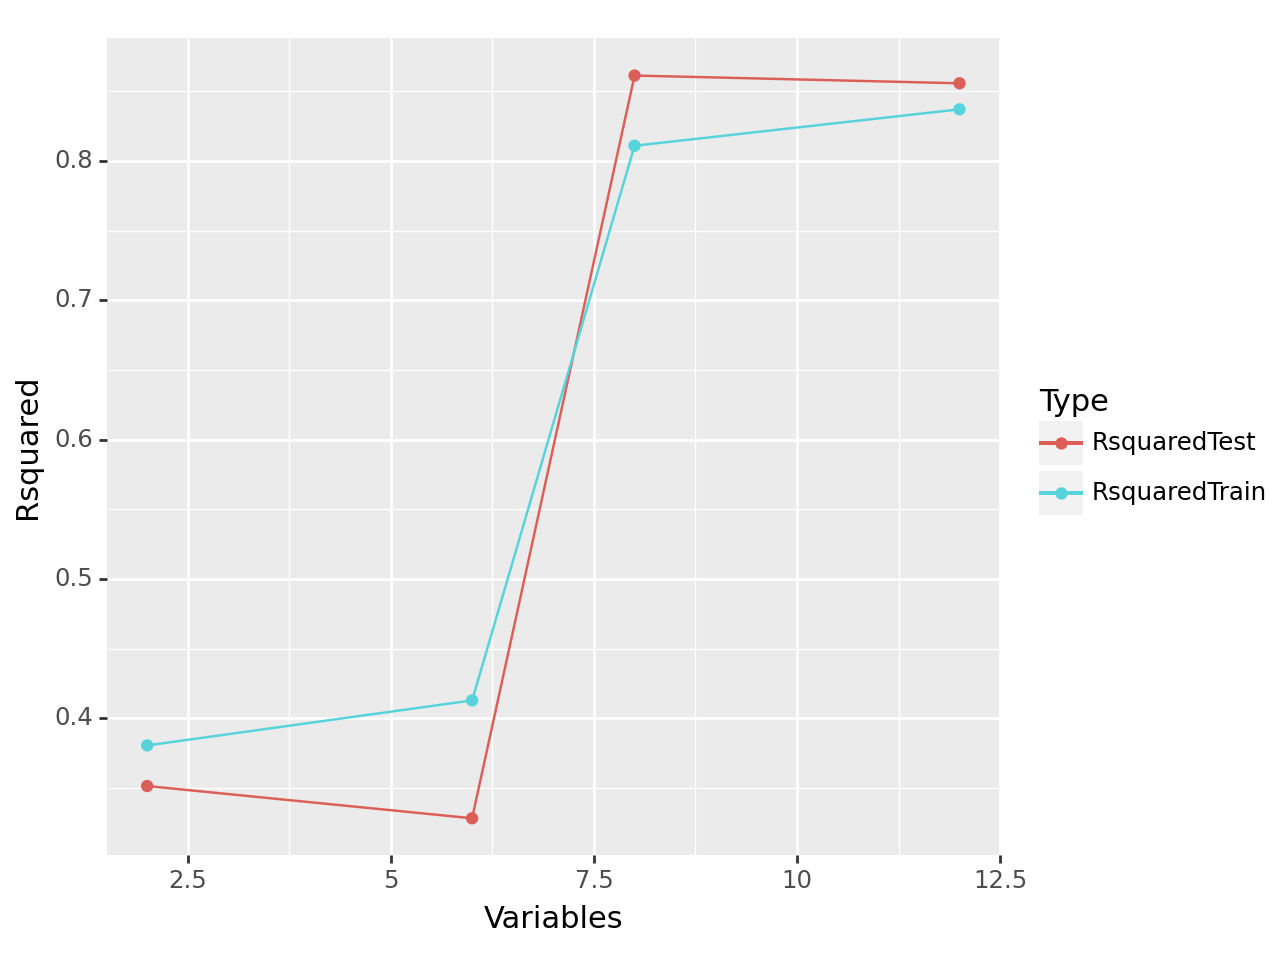

In [87]:
df_melted = df.melt(id_vars=['Variables'],
                    value_vars=['RsquaredTest', 'RsquaredTrain'],
                    var_name='Type',
                    value_name='Rsquared')


plot = (ggplot(df_melted)
        + geom_point(aes(x='Variables', y='Rsquared', color='Type'))
        + geom_line(aes(x='Variables', y='Rsquared', color='Type', group='Type')))

print(plot)

I would say the best model is probably model 2, because there is a significant difference between the r squareds for test and train and it is pretty high, whil model 1's test and train r squares are close enough that it seems uneccesary to have all of those variables